## Introdução
Este arquivo tem como objetivo realizar uma análise exploratória dos dados para compreender melhor suas características e estrutura. O trabalho está dividido em quatro etapas principais:

1. Exploração Inicial: Entendimento básico dos dados e suas variáveis.

2. Limpeza e Tratamento: Ajuste e correção dos dados para garantir a qualidade da análise.

3. Análise das Categorias: Estudo detalhado das variáveis categóricas e sua influência no faturamento.

4. Análise Temporal: Investigação das séries temporais para identificar tendências e padrões ao longo do tempo.

------------------------------

## 1. Exploração Inicial

#### 1.1 Importar bibliotecas essenciais


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.figure(figsize=(14,7))
import plotly.express as px
import plotly.graph_objects as go

<Figure size 1400x700 with 0 Axes>

#### 1.2 Carregamento dos Dados

In [5]:
df = pd.read_csv('dataset.csv', sep=';', decimal=',')

df.head()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,11934.0,414.0,431869.08,431869.08,0,0,0,0,0,NaN,455.4
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,540.0,252.0,27743.40,27743.40,0,0,0,0,0,NaN,773.4
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,54012.0,1410.0,962860.20,962860.20,0,1,0,0,0,35.0,341.4
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,438.0,NaN,7608.60,7608.60,0,0,0,0,0,NaN,450.9
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,2760.0,240.0,83339.40,83339.40,0,0,0,0,0,NaN,431.4


#### 1.3 Dimensões e Tipos de Dados

In [6]:
print(f"Shape do dataset: {df.shape}")
df.info()

Shape do dataset: (173923, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  float64
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  float64
 10  VL_RECEITA_LIQUIDA      173923 non-null  float64
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  in

#### 1.4 Verificação de Dados Faltantes

In [7]:
df.isnull().sum()

COD_CICLO                      0
FLG_DATA                       0
COD_MATERIAL                   0
COD_CANAL                      0
DES_CATEGORIA_MATERIAL         0
DES_MARCA_MATERIAL             0
COD_REGIAO                     0
QT_VENDA_BRUTO                 0
QT_DEVOLUCAO               86759
VL_RECEITA_BRUTA               0
VL_RECEITA_LIQUIDA             0
FLG_CAMPANHA_MKT_A             0
FLG_CAMPANHA_MKT_B             0
FLG_CAMPANHA_MKT_C             0
FLG_CAMPANHA_MKT_D             0
FLG_CAMPANHA_MKT_E             0
PCT_DESCONTO              116972
VL_PRECO                       0
dtype: int64

#### 1.5 Estatísticas Descritivas Iniciais

In [8]:
df.select_dtypes('float64').describe()

,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,PCT_DESCONTO,VL_PRECO
count,1.739230e+05,87164.000000,1.739230e+05,1.739230e+05,56951.000000,173923.000000
mean,1.050377e+04,491.800720,6.475499e+05,6.421887e+05,20.178633,543.703809
std,3.327551e+04,722.866615,2.790452e+06,2.780483e+06,9.847025,243.974723
min,2.345454e+02,234.000000,2.340600e+02,2.340600e+02,0.000000,234.060000
25%,3.960000e+02,234.000000,6.369720e+03,6.273450e+03,15.120000,389.400000
50%,2.070000e+03,270.000000,6.738048e+04,6.663558e+04,20.000000,461.400000
75%,8.634000e+03,444.000000,3.468348e+05,3.427422e+05,30.000000,593.400000
max,1.865862e+06,31662.000000,2.292459e+08,2.292459e+08,35.000000,5539.620000


#### 1.6 Valores Únicos por Coluna

In [9]:
df.nunique()

COD_CICLO                     53
FLG_DATA                       2
COD_MATERIAL                2252
COD_CANAL                      2
DES_CATEGORIA_MATERIAL         6
DES_MARCA_MATERIAL            85
COD_REGIAO                     2
QT_VENDA_BRUTO             14548
QT_DEVOLUCAO                1043
VL_RECEITA_BRUTA          119095
VL_RECEITA_LIQUIDA        124054
FLG_CAMPANHA_MKT_A             2
FLG_CAMPANHA_MKT_B             2
FLG_CAMPANHA_MKT_C             2
FLG_CAMPANHA_MKT_D             2
FLG_CAMPANHA_MKT_E             1
PCT_DESCONTO                 528
VL_PRECO                   10867
dtype: int64

-------------------

## 2. Limpeza e Tratamento

#### 2.1 Tratamento de Valores Faltantes

As variáveis PCT_DESCONTO e QT_DEVOLUCAO possuem valores ausentes. Como ambas são contínuas, poderíamos usar a mediana, mas neste caso a ausência indica que não houve desconto ou não houve devolução. Portanto, vamos preencher os valores faltantes com zero, que representa corretamente esses cenários.

In [10]:
df[['PCT_DESCONTO', 'QT_DEVOLUCAO']] = df[['PCT_DESCONTO', 'QT_DEVOLUCAO']].fillna(0)

df[['PCT_DESCONTO', 'QT_DEVOLUCAO']].head()

,PCT_DESCONTO,QT_DEVOLUCAO
0,0.0,414.0
1,0.0,252.0
2,35.0,1410.0
3,0.0,0.0
4,0.0,240.0


#### 2.2 Verificação e Correção de Receita Bruta e Líquida

Ao analisar um simples df.head(), observamos inconsistências entre as variáveis QT_VENDA_BRUTO, VL_PRECO e VL_RECEITA_BRUTA. Partindo da fórmula básica de que faturamento bruto = quantidade × preço, percebemos que em muitos casos essa relação não se sustenta. Assumimos que o valor de VL_RECEITA_BRUTA está correto. Com isso, optamos por ajustar o campo de preço unitário (VL_PRECO) para refletir o faturamento com base na quantidade registrada, respeitando a regra de que quantidade deve ser um número inteiro. Essa foi a decisão tomada para garantir consistência nos dados para as próximas etapas.

In [11]:
df[['QT_VENDA_BRUTO', 'VL_PRECO', 'VL_RECEITA_BRUTA']].astype(int).sort_values(['QT_VENDA_BRUTO']).head()

,QT_VENDA_BRUTO,VL_PRECO,VL_RECEITA_BRUTA
43462,234,817,287
140227,234,817,287
83747,234,1791,375
138748,234,1791,375
138390,234,1791,375


In [12]:
# Ajustando valor
df['VL_PRECO'] = df['VL_RECEITA_BRUTA'] / df['QT_VENDA_BRUTO']

Seguindo a mesma lógica, também identificamos inconsistências na variável VL_RECEITA_LIQUIDA. Pela lógica, ela deveria ser calculada como VL_RECEITA_BRUTA × (1 - PCT_DESCONTO). No entanto, vários registros não seguem essa regra. Assim como fizemos com a VL_PRECO, assumimos que o valor de VL_RECEITA_BRUTA e o PCT_DESCONTO estão corretos e optamos por recalcular VL_RECEITA_LIQUIDA com base nessa fórmula, garantindo a consistência dos dados.

In [13]:
lista=['QT_VENDA_BRUTO', 'VL_PRECO', 'VL_RECEITA_BRUTA', 'PCT_DESCONTO', 'VL_RECEITA_LIQUIDA']
df[lista].sort_values(['PCT_DESCONTO'], ascending=False).head()

,QT_VENDA_BRUTO,VL_PRECO,VL_RECEITA_BRUTA,PCT_DESCONTO,VL_RECEITA_LIQUIDA
2,54012.0,17.826783,962860.20,35.0,962860.20
68994,172716.0,25.862894,4466935.56,35.0,4466935.56
126062,13230.0,33.985896,449633.40,35.0,449633.40
6258,12672.0,12.684517,160738.20,35.0,160738.20
173860,1032.0,13.118605,13538.40,35.0,13538.40


In [14]:
#Ajustando a Receita líquida
df['VL_RECEITA_LIQUIDA'] = df['VL_RECEITA_BRUTA'] * (1 - df['PCT_DESCONTO']/100)

#### 2.3 – Criação de Variáveis para Análise

Para facilitar a análise temporal e a avaliação do impacto de campanhas, foram criadas duas novas variáveis:

- ANO e CICLO: extraídas a partir do campo COD_CICLO, permitindo agrupar dados por período de forma mais interpretável.

- NUM_CAMPANHAS_ATIVAS: variável numérica que indica quantas campanhas (A, B, C, D ou E) estiveram ativas no ciclo. Recebe um valor inteiro de 0 a 5, correspondente à soma das flags de campanha ativadas naquele período

##### - ANO e CICLO

In [15]:
def split_cod_ciclo(X):
    X = X.copy()
    X['ANO'] = X['COD_CICLO'].astype(str).str.zfill(6).str[:4].astype(int)
    X['CICLO'] = X['COD_CICLO'].astype(str).str.zfill(6).str[4:].astype(int)
    return X[['ANO', 'CICLO']]

df[['ANO', 'CICLO']] = split_cod_ciclo(df)

df[['ANO', 'CICLO']].head()

,ANO,CICLO
0,2019,17
1,2020,5
2,2019,1
3,2018,13
4,2020,6


##### - NUM_CAMPANHAS_ATIVAS

In [16]:
campanha_flags = ['FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E']

df['NUM_CAMPANHAS_ATIVAS'] = df[campanha_flags].sum(axis=1)

In [17]:
df['NUM_CAMPANHAS_ATIVAS'].value_counts()

NUM_CAMPANHAS_ATIVAS
0    117147
1     43578
2     11235
3      1680
4       283
Name: count, dtype: int64

Com os ajustes aplicados, a base agora está organizada, consistente e pronta para as próximas etapas de análise exploratória e modelagem.

-----------------------

## 3. Análise das Categorias

Nesta etapa, analisamos a participação das principais variáveis categóricas no receita bruta total. As variáveis selecionadas para esta análise foram:

- Canal de Venda (COD_CANAL)

- Categoria do Material (DES_CATEGORIA_MATERIAL)

- Região da Venda (COD_REGIAO)

- Campanhas de Marketing Ativas (FLG_CAMPANHA_MKT)

Agrupamos cada variável categórica, somamos a receita bruta e calculamos a porcentagem do total. Como os valores estão anonimizados e provavelmente foram multiplicados, a porcentagem é mais relevante para entender a representatividade de cada grupo.

####    3.1 Canal de Venda (COD_CANAL)

In [18]:
col = 'COD_CANAL'

df_grouped = df.groupby([col])['VL_RECEITA_BRUTA'].sum().astype(int).reset_index()


fig = go.Figure(data=[go.Pie(labels=df_grouped[col], values=df_grouped['VL_RECEITA_BRUTA'], hole=.3, textinfo='label+percent')])
fig.update_layout(title_text=f"<b>Distribuição do Faturamento por {col}</b>")
fig.show()

####    3.2 Categoria do Material (DES_CATEGORIA_MATERIAL)

In [19]:
col = 'DES_CATEGORIA_MATERIAL'

df_grouped = df.groupby([col])['VL_RECEITA_BRUTA'].sum().astype(int).reset_index()


fig = go.Figure(data=[go.Pie(labels=df_grouped[col], values=df_grouped['VL_RECEITA_BRUTA'], hole=.3, textinfo='label+percent')])
fig.update_layout(title_text=f"<b>Distribuição do Faturamento por {col}</b>")
fig.show()

#### 3.3 Região da Venda (COD_REGIAO)

In [20]:
col = 'COD_REGIAO'

df_grouped = df.groupby([col])['VL_RECEITA_BRUTA'].sum().astype(int).reset_index()

fig = go.Figure(data=[go.Pie(labels=df_grouped[col], values=df_grouped['VL_RECEITA_BRUTA'], hole=.3, textinfo='label+percent')])
fig.update_layout(title_text=f"<b>Distribuição do Faturamento por {col}</b>")
fig.show()

#### 3.4 Campanhas de Marketing Ativas (FLG_CAMPANHA_MKT)

- Nesta etapa, analisamos o desempenho individual das campanhas considerando apenas registros com uma única campanha ativa, e a categoria "Outros" no gráfico representa os registros sem campanha ou com múltiplas campanhas simultâneas.

In [21]:
col = 'FLG_CAMPANHA_MKT'

# Explode campanhas ativas para uma linha por campanha (quando só 1 está ativa)
df_melt = df[df['NUM_CAMPANHAS_ATIVAS'] == 1].melt(
    id_vars=['VL_RECEITA_LIQUIDA'],
    value_vars=campanha_flags,
    var_name=col,
    value_name='Ativa'
)

# Filtra campanhas ativas
df_melt = df_melt[df_melt['Ativa'] == 1]

# Agrupa soma e mediana da receita por campanha
df_grouped = df_melt.groupby(col)['VL_RECEITA_LIQUIDA'].agg(Receita_Total='sum').reset_index()

# Calcula receita que não pertence a campanhas únicas
receita_outros = df['VL_RECEITA_LIQUIDA'].sum() - df_grouped['Receita_Total'].sum()

# Adiciona categoria "Outros"
df_grouped = pd.concat([
    df_grouped,
    pd.DataFrame({col: ['Outros'], 'Receita_Total': [receita_outros]})
], ignore_index=True)

# Gráfico de pizza com participação das campanhas
fig = go.Figure(data=[go.Pie(
    labels=df_grouped[col],
    values=df_grouped['Receita_Total'],
    hole=.3,
    textinfo='label+percent'
)])

fig.update_layout(title_text=f"<b>% do Faturamento Total por {col}</b>")
fig.show()


#### Conclusões Finais

A análise dos dados permitiu identificar padrões relevantes no comportamento de vendas e no impacto das campanhas de marketing. Abaixo, destacamos os principais pontos:

- Categoria do Material: A categoria anon_S12 concentra a maior parte do faturamento, evidenciando sua forte influência nas vendas.

- Campanhas de Marketing: Campanhas ativas, em especial a Campanha B, tiveram grande impacto na geração de receita.

--------------------

## 4. Análise Temporal 

Nesta etapa, exploramos as vendas e devoluções ao longo do tempo, considerando períodos definidos por ano e ciclo. O objetivo é identificar padrões e efeitos das campanhas que possam influenciar a previsão de demanda.

#### 4.1 Faturamento Bruto por Ano e Ciclo


Vamos mostrar a evolução do faturamento ao longo dos períodos, evidenciando tendências e sazonalidades.

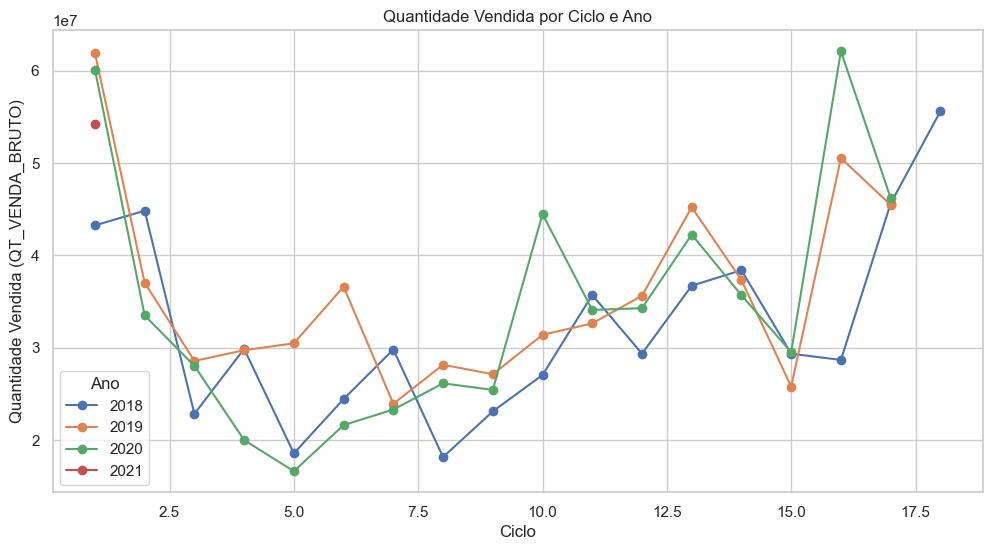

In [22]:
df_grouped = df.groupby(['ANO', 'CICLO']).agg({
    'QT_VENDA_BRUTO': 'sum'
}).reset_index()

anos = sorted(df_grouped['ANO'].unique())

for ano in anos:
    df_ano = df_grouped[df_grouped['ANO'] == ano]
    plt.plot(df_ano['CICLO'], df_ano['QT_VENDA_BRUTO'], marker='o', label=str(ano))

plt.title('Quantidade Vendida por Ciclo e Ano')
plt.xlabel('Ciclo')
plt.ylabel('Quantidade Vendida (QT_VENDA_BRUTO)')
plt.legend(title='Ano')
plt.grid(True)
plt.show()


#### 4.2 Percentual de Devoluções por Ano e Ciclo

Vamos apresentar a variação das devoluções ao longo do tempo, mostrando uma possível tendencia.

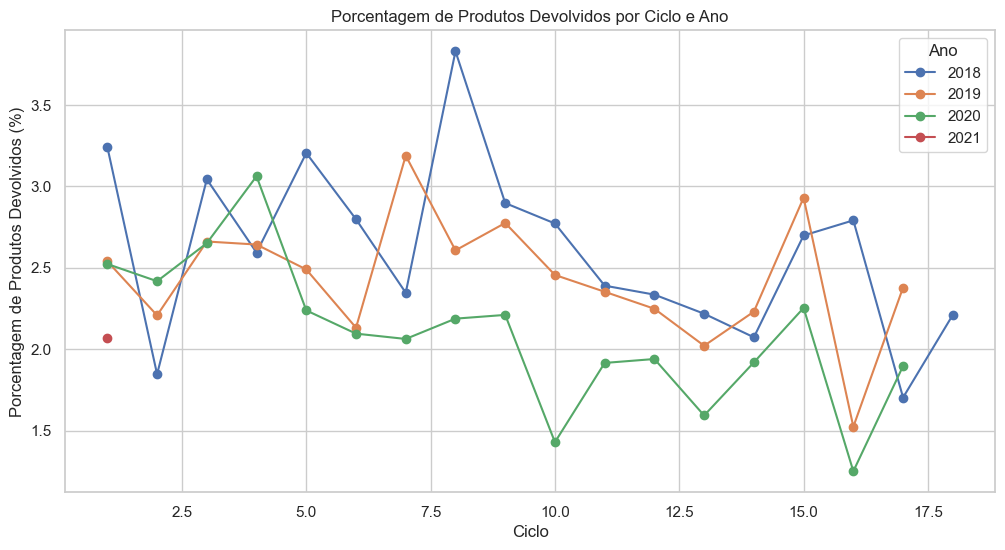

In [23]:
# Agrupar por ANO e CICLO somando vendas e devoluções
df_grouped = df.groupby(['ANO', 'CICLO']).agg({
    'QT_VENDA_BRUTO': 'sum',
    'QT_DEVOLUCAO': 'sum'
}).reset_index()

# Calcular porcentagem de devolução
df_grouped['PCT_DEVOLUCAO'] = (df_grouped['QT_DEVOLUCAO'] / (df_grouped['QT_VENDA_BRUTO'] + df_grouped['QT_DEVOLUCAO'])) * 100

for ano in anos:
    df_ano = df_grouped[df_grouped['ANO'] == ano]
    plt.plot(df_ano['CICLO'], df_ano['PCT_DEVOLUCAO'], marker='o', label=str(ano))

plt.title('Porcentagem de Produtos Devolvidos por Ciclo e Ano')
plt.xlabel('Ciclo')
plt.ylabel('Porcentagem de Produtos Devolvidos (%)')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

#### 4.3 Quantidade Vendida com e sem Campanha (%)

Vamos comparar a participação percentual das vendas em períodos com e sem campanhas de marketing, avaliando o efeito das promoções.

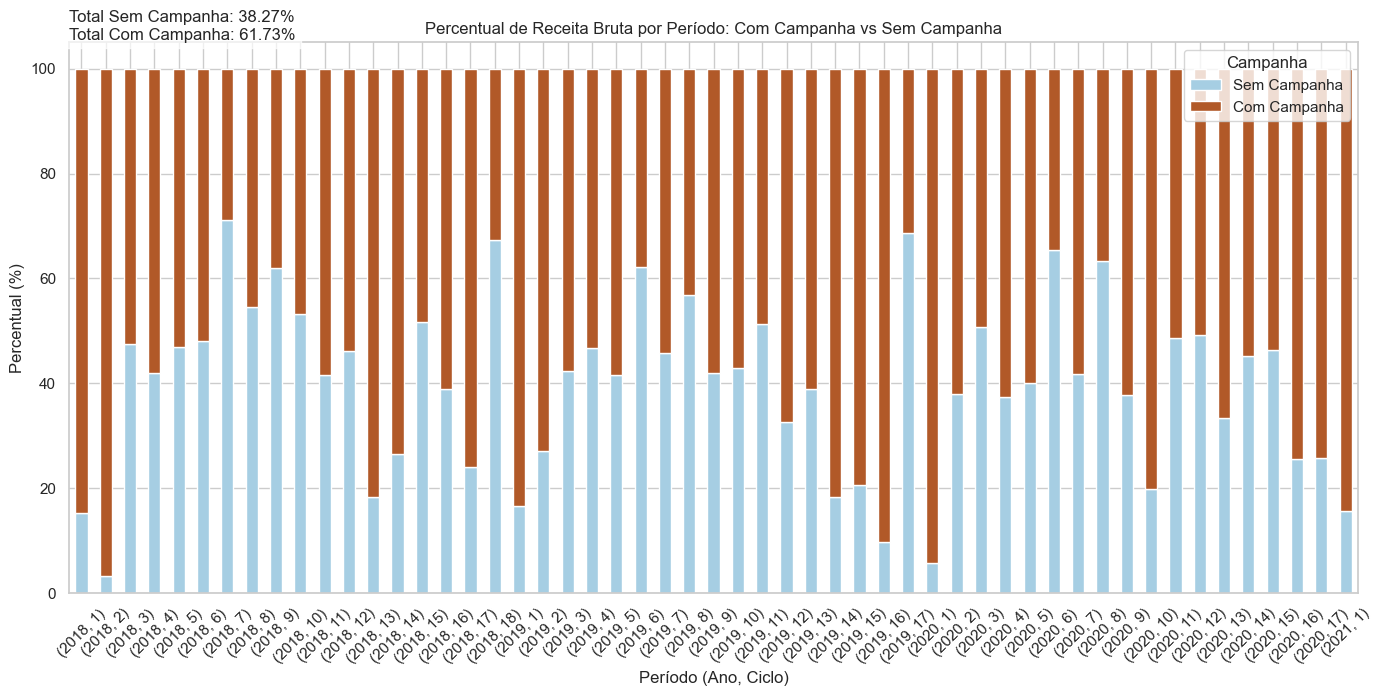

In [24]:
df['COM_CAMPANHA'] = df['NUM_CAMPANHAS_ATIVAS'].apply(lambda x: 'Com Campanha' if x == 0 else 'Sem Campanha')

df_grouped = df.groupby(['ANO', 'CICLO', 'COM_CAMPANHA'])['VL_RECEITA_LIQUIDA'].sum().reset_index()
df_pivot = df_grouped.pivot_table(index=['ANO', 'CICLO'], columns='COM_CAMPANHA', values='VL_RECEITA_LIQUIDA', fill_value=0)
df_pivot.columns = ['Sem Campanha', 'Com Campanha']

df_pivot_pct = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

ax = df_pivot_pct.plot(kind='bar', stacked=True, figsize=(14,7), colormap='Paired')
plt.title('Percentual de Receita Bruta por Período: Com Campanha vs Sem Campanha')
plt.xlabel('Período (Ano, Ciclo)')
plt.ylabel('Percentual (%)')
plt.legend(title='Campanha')
plt.xticks(rotation=45)
plt.tight_layout()

total = df_pivot.sum()
total_pct = (total / total.sum()) * 100

x_pos = -0.5
y_pos = 105

text = f'Total Sem Campanha: {total_pct["Sem Campanha"]:.2f}%\nTotal Com Campanha: {total_pct["Com Campanha"]:.2f}%'
ax.text(x_pos, y_pos, text, fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

plt.show()

Conclusões das Análises Temporais:

4.1 Faturamento Bruto por Ano e Ciclo
Observa-se que a receita bruta se mantém estável ao longo dos três anos, com uma clara sazonalidade no início e no fim de cada ano, nos primeiros e últimos ciclos.

4.2 Percentual de Devoluções por Ano e Ciclo
O percentual de devoluções apresenta uma queda consistente nos últimos anos, indicando uma melhoria positiva.

4.3 Quantidade Vendida com e sem Campanha (%)
No geral, a receita nos ciclos com campanha é aproximadamente o dobro da receita nos ciclos sem campanha, destacando o impacto positivo das campanhas nas vendas.

Agora que a análise foi concluída, vamos avançar para a criação do modelo que irá prever a quantidade de itens vendidos.